1641221/1641221 [==============================] - 1s 0us/step


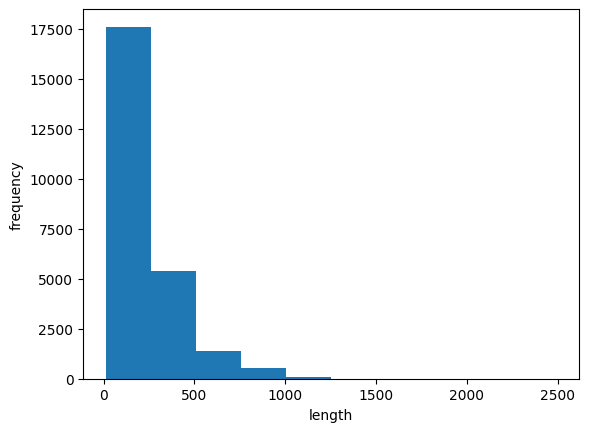

Epoch 1/15
625/625 [==============================] - 23s 32ms/step - loss: 0.6903 - accuracy: 0.5784 - val_loss: 0.6847 - val_accuracy: 0.6508
Epoch 2/15
625/625 [==============================] - 18s 30ms/step - loss: 0.6397 - accuracy: 0.6875 - val_loss: 0.6037 - val_accuracy: 0.6962
Epoch 3/15
625/625 [==============================] - 21s 33ms/step - loss: 0.5817 - accuracy: 0.7188 - val_loss: 0.5677 - val_accuracy: 0.7274
Epoch 4/15
625/625 [==============================] - 18s 29ms/step - loss: 0.5459 - accuracy: 0.7466 - val_loss: 0.5358 - val_accuracy: 0.7526
Epoch 5/15
625/625 [==============================] - 20s 32ms/step - loss: 0.5164 - accuracy: 0.7671 - val_loss: 0.5111 - val_accuracy: 0.7674
Epoch 6/15
625/625 [==============================] - 21s 33ms/step - loss: 0.4925 - accuracy: 0.7800 - val_loss: 0.4922 - val_accuracy: 0.7752
Epoch 7/15
625/625 [==============================] - 18s 29ms/step - loss: 0.4723 - accuracy: 0.7913 - val_loss: 0.4728 - val_accuracy:

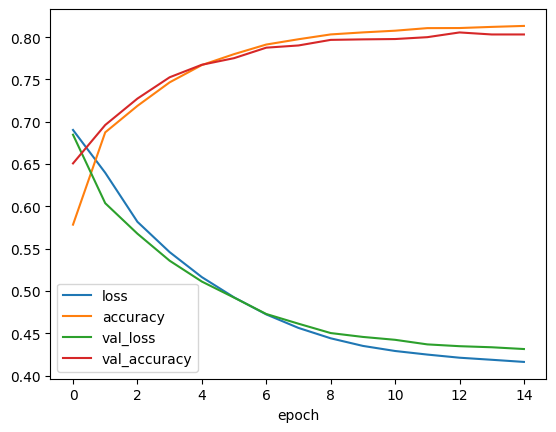

782/782 [==============================] - 6s 8ms/step - loss: 0.4282 - accuracy: 0.8018


[0.42821893095970154, 0.8018400073051453]

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 500) # num_words의 값은 사용할 단어의 수, 훈련 속도를 고려하여 500으로 설정

# 실제 리뷰 문장을 가져와 저장
word_to_index = imdb.get_word_index()
index_to_word = {}

# 0, 1, 2는 특별 토큰이기 때문에 3을 더해서 배열에 저장
for key, value in word_to_index.items():
  index_to_word[value + 3] = key

# 0 : 패딩 토큰
# 1 : 문장 시작 토큰
# 2 : 미확인 토큰
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

# 각 데이터의 길이 데이터를 배열로 저장
lengths = np.array([len(x) for x in x_train])

# 길이 분포를 그래프로 표현
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

# 훈련 데이터셋을 20%를 검증용 데이터셋으로 분류
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# 데이터의 최대 길이 설정, 100이 넘으면 100까지만 끊고 100이 안되는 데이터는 0으로 채움
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)

# 모델 생성
model = models.Sequential(name = "NSU_RNN")
model.add(layers.Embedding(500, 16, input_length = 100)) # embedding은 단어를 지정된 크기의 실수벡터로 생성, 문자의 최대 길이를 100으로 하고 500개의 단어를 16개의 실수로 출력
model.add(layers.LSTM(8)) # RNN 대신 LSTM 추가
model.add(layers.Dense(1, activation = 'sigmoid')) # 출력 값이 하나인 이진 분류이므로 시그모이드 함수 사용

# 모델 컴파일 + 훈련
rmsprop = RMSprop(learning_rate = 1e-4) # 경사 하강법 기반 최적화 알고리즘
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy') # 이진 분류이므로 binary_crossentropy 사용
history = model.fit(train_seq, y_train, epochs = 15, batch_size = 32, validation_data = (val_seq, y_val))

# 그래프를 통해 모델 훈련 결과 확인
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.xlabel('epoch')
plt.show()

# 모델 평가
test_seq = pad_sequences(x_test, maxlen = 100)
model.evaluate(test_seq, y_test)